# Hyperparameters and Model Validation

The first two pieces of this—the choice of model and choice of hyperparameters—are perhaps the most important part of using these tools and techniques effectively. In order to make an informed choice, we need a way to validate that our model and our hyperparameters are a good fit to the data. 

# Model validation

Model validation is a critical step in the process of building and evaluating machine learning models. It involves assessing the performance of a trained model to ensure that it can generalize well to new, unseen data. Proper model validation helps you estimate how well your model is likely to perform on real-world data and avoid overfitting, where a model performs well on the training data but poorly on new data.

# Here are some common model validation techniques:

1.Train-Test Split: This is one of the simplest forms of model validation. You split your dataset into a training set and a separate test set. The model is trained on the training set and then evaluated on the test set. This helps you estimate how well the model generalizes to new, unseen data.

2.Cross-Validation: Cross-validation involves partitioning the dataset into multiple subsets (folds). The model is trained on some folds and evaluated on others, and this process is repeated multiple times with different fold combinations. Common variants of cross-validation include k-fold cross-validation, stratified k-fold cross-validation, and leave-one-out cross-validation.

3.Shuffle Split: This technique randomly shuffles the dataset and splits it into training and test sets. It's useful when you want to perform multiple train-test splits for validation.

4.Time Series Split: When working with time-series data, you want to ensure that your model is evaluated on past data and tested on future data. Time series cross-validation involves training on earlier time periods and testing on later time periods.

5.Nested Cross-Validation: This technique combines cross-validation for hyperparameter tuning with an outer loop of cross-validation for model evaluation. It helps you avoid overfitting during hyperparameter optimization.

6.Bootstrap Sampling: Bootstrap validation involves repeatedly resampling the dataset with replacement to create multiple training and test sets. It's useful when you have limited data.

7.Holdout Validation: Similar to train-test split, holdout validation involves partitioning the dataset into a training set and a validation set. The validation set is used to tune hyperparameters and evaluate the model's performance.

8.Validation Curves: Validation curves plot a model's performance on both the training and validation sets as a function of a hyperparameter. They help identify potential overfitting or underfitting.

9.Learning Curves: Learning curves plot a model's performance on the training and validation sets as a function of the training data size. They help assess whether the model would benefit from more training data.

10.Metrics: Use appropriate evaluation metrics for your problem, such as accuracy, precision, recall, F1-score, ROC-AUC, etc., depending on whether your problem is classification, regression, or another type of task.

## Model validation the right way: Holdout sets

### 
    Holdout validation, also known as the holdout method .Holdout Validation: Similar to train-test split, holdout validation involves partitioning the dataset into a training set and a validation set. The validation set is used to tune hyperparameters and evaluate the model's performance.. Here's how you can perform holdout validation:

Data Splitting: Divide your dataset into two parts: the training set and the validation set. The usual split ratio is around 70-80% of the data for training and 20-30% for validation, but this can vary based on the size of your dataset and the specific problem.

Training: Train your machine learning model on the training set. During training, the model learns patterns in the data and adjusts its parameters to minimize the chosen loss function.

Validation: After training, use the validation set to assess how well your model performs on new, unseen data. Make predictions on the validation set and evaluate the model's performance using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, etc.).

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
# Load iris  dataset
iris=load_iris()
X=iris.data
y=iris.target

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)
 
# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 1.0


#### Hold-out method for Model Selection
The hold-out method can also be used for model selection or hyperparameters tuning.

In [15]:
#Split the data into training, validation, and test datasets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the validation dataset
y_pred = model.predict(X_val)

# Evaluate the model performance on validation dataset 

accuracy=accuracy_score(y_val,y_pred)
print(f"Validation Accuracy:{accuracy}")

# Make predictions on the test dataset
y_pred_test = model.predict(X_test)
 
# Evaluate the model performance on the test dataset
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test}")

Validation Accuracy:0.90625
Test Accuracy: 1.0


# Cross-Validation
Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is  used for estimating the performance of a machine learning model and tuning its hyperparameters.

In [23]:
# Load iris  dataset
iris=load_iris()
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

# Initialize and train the model
model = LogisticRegression()
y1_model=model.fit(X_train, y_train).predict(X_test)
y2_model=model.fit(X_test, y_test).predict(X_train)

accuracy_score(y_test, y1_model), accuracy_score(y_train, y2_model)

(0.9473684210526315, 0.9375)

### k-Fold Cross-Validation
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. 

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=5)

C:\Users\Invisible Boy\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Leave-One-Out (LOO) Cross-Validation:
    Each fold contains all but one data point. This is computationally expensive but can be useful for very small datasets.It is a specific form of cross-validation where each data point in the dataset is used as a validation set once, while the rest of the data is used for training. LOO is a special case of k-fold cross-validation where k is equal to the number of data points in the dataset.

In [35]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Selecting the Best Model

### The bias-variance trade-off
The bias-variance trade-off is a fundamental concept in machine learning that addresses the trade-off between two sources of error that affect a model's performance: bias and variance. Finding the right balance between bias and variance is essential to building models that generalize well to unseen data.

#### Bias:

Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model.
A model with high bias is too simplistic and makes strong assumptions about the data, leading to underfitting.
High bias can cause the model to miss relevant relationships in the data, resulting in poor performance on both the training and test sets.

#### Variance:

Variance refers to the error introduced due to the model's sensitivity to small fluctuations in the training data.
A model with high variance captures noise and fluctuations in the training data, leading to overfitting.
High variance can result in a model that performs well on the training data but poorly on new, unseen data.

#### The trade-off can be:

A low-bias, high-variance model might fit the training data very well, but it might not generalize well to new data due to its sensitivity to noise in the training set.
A high-bias, low-variance model might not fit the training data well, and it may also have limited generalization capability.

#### Finding the right balance between bias and variance involves selecting an appropriate model complexity and regularization strategy:

Model Complexity: Increasing model complexity (e.g., adding more features, increasing the number of layers in a neural network) reduces bias and increases the potential to capture intricate patterns in the data. However, it can also increase variance.
    
Regularization: Techniques like L1 and L2 regularization help control model complexity by penalizing large coefficients. Regularization can help reduce overfitting and variance.

#### Strategies to address the bias-variance trade-off include:

Bias Reduction:

Use more complex models with a higher capacity to capture intricate patterns in the data.
Increase the number of features or use more advanced algorithms.

Variance Reduction:

Gather more training data to reduce the impact of noise.
Use techniques like regularization to discourage the model from fitting noise in the data.
Ensemble methods (e.g., Random Forests, Gradient Boosting) combine multiple models to reduce variance.

Model Selection and Tuning:

Use techniques like cross-validation to evaluate models and their performance.
Regularize the model's complexity to prevent overfitting.

### The R-squared (𝑅²) score
•	The R-squared (𝑅²) score, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) in a regression model. It quantifies how well the regression model fits the observed data.

R 
2
 =1 indicates that the model explains all the variability of the response data around its mean. In other words, the model perfectly fits the data.
    
R2=0 indicates that the model's predictions are no better than simply predicting the mean of the response variable for all observations. The model provides no improvement over a naive baseline model.
    
R2 can also be negative if the model performs worse than the baseline model.


R2=1− (Sum of Squared Residuals/Total Sum of Squares)


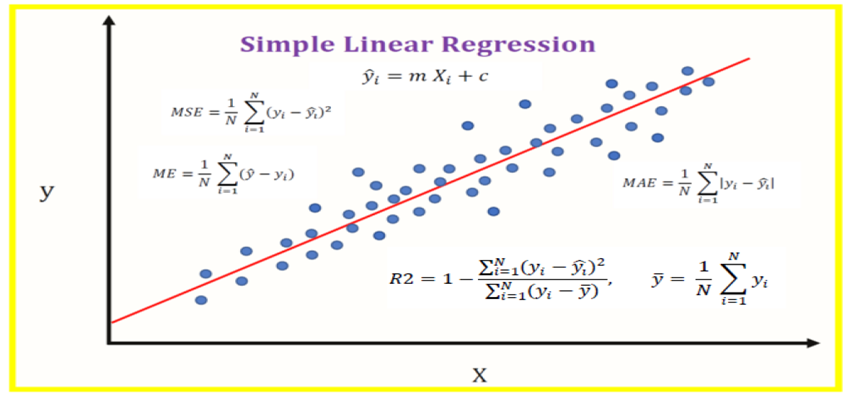

In [64]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

r2_score(y_test,y_pred)

1.0

# Validation curves in Scikit-Learn

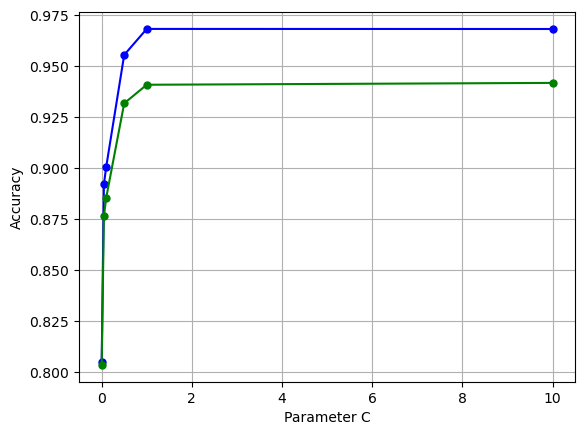

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
#
# IRIS Dataset is loaded
#
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['species'] = iris.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=1,
stratify=df.iloc[:, -1])
#
# Create the pipeline having steps for standardization and estimator as LogisticRegression
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]
train_scores, test_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=10,
param_name='logisticregression__C', param_range=param_range)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

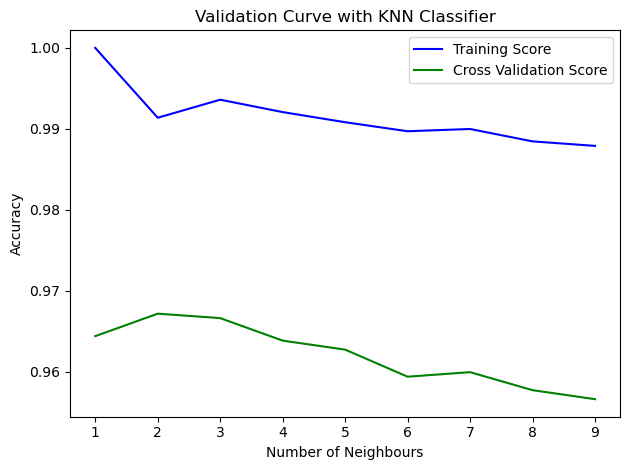

In [66]:
# Import Required libraries
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
 
# Loading dataset
dataset = load_digits()
 
# X contains the data and y contains the labels
X, y = dataset.data, dataset.target
 
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 10, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), X, y,
                                           param_name="n_neighbors",
                                           param_range=parameter_range,
                                           cv=5, scoring="accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()